# Omicorn Sentimetn Analysis

Beberapa waktu lalu WHO merilis varian baru dari covid-19. Varian ini diberi nama dengan Omicorn. Pada project ini kita akan melakukan sentiment terhadap tweet seputar dengan varian omicorn ini.

## 1. Import Library

In [1]:
import pandas as pd # berfungsi untuk membaca file csv
import numpy as np # berfungsi untuk mengolah data
import matplotlib.pyplot as plt # berfungsi untuk menampilkan grafik
from nltk.sentiment.vader import SentimentIntensityAnalyzer # berfungsi untuk melakukan analisis sentimen
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator # berfungsi untuk membuat wordcloud
import nltk # berfungsi untuk melakukan tokenisasi dan stemming pada data teks
import re # berfungsi untuk melakukan filtering pada data teks (menghilangkan tanda baca, angka, dll) 
import string # berfungsi untuk melakukan filtering pada data teks (menghilangkan tanda baca, angka, dll)
from nltk.corpus import stopwords # berfungsi untuk melakukan filtering pada data teks (menghilangkan kata-kata yang tidak penting)
nltk.download('stopwords') # berfungsi untuk mendownload stopwords
nltk.download('vader_lexicon') # berfungsi untuk mendownload vader_lexicon

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yudhaislamisulistya/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yudhaislamisulistya/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

## 2. Membaca File

Dataset ini digunakan untuk menyelesaikan project untuk sentimen analisis omicorn yang berasal dari kaggle.

In [2]:
data = pd.read_csv('omicron.csv') # berfungsi untuk membaca file csv
data.head(10) # berfungsi untuk menampilkan 10 data pertama

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1491840066506743820,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:22:43,Daily US Confirmed Covid Cases by County For M...,NaN,smcapplication,0,0,False
1,1491839660674490371,Gatherer Thompson,Corporate,I'm with the people who are with everyone. A s...,2009-05-10 23:01:22,639,1931,46369,False,2022-02-10 18:21:06,@Yascha_Mounk #CDC says number of fully #vacci...,"['CDC', 'vaccinated', 'Omicron', 'hospital']",Twitter Web App,0,0,False
2,1491839607368867842,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:20:54,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,0,0,False
3,1491839207169351689,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:19:18,Daily US Confirmed Covid Cases by County For L...,NaN,smcapplication,2,1,False
4,1491839165608177667,Brownyard Group,"Bay Shore, NY",We offer liability coverage for the Security G...,2009-12-08 16:41:53,375,284,61,False,2022-02-10 18:19:08,With the #Beijing2022 #WinterOlympics already ...,"['Beijing2022', 'WinterOlympics', 'olympians',...",Agorapulse app,0,0,False
5,1491839121949614082,Wont_Back_Down,State 48,Wife Mom #MSULaw lawyer nuked by the Blue Bird...,2021-11-25 19:33:12,116,215,1468,False,2022-02-10 18:18:58,Doctor Who Helped Discover #Omicron Says She W...,['Omicron'],Twitter for iPhone,0,0,False
6,1491838918832050183,pmc,NaN,NaN,2008-03-04 14:39:58,1354,345,37425,False,2022-02-10 18:18:09,Someone used the term “Corona” to refer to the...,"['coronavirus', 'covid', 'omicron']",Twitter for iPhone,0,0,False
7,1491838814372782086,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:17:45,Daily US Confirmed Covid Cases by County For K...,NaN,smcapplication,1,1,False
8,1491838505777090560,🄳🄰🅅🄸🅂 ④⓪④ Cassandratic Equations,Chicago,"I was born, probably. Scientician, drew stuff,...",2011-09-11 03:00:28,523,737,80023,False,2022-02-10 18:16:31,"This month, Tonga finally has #Omicron.\n106,0...",['Omicron'],Twitter for Android,0,0,False
9,1491838305129750529,Nathan Joyner,"Los Angeles, CA",Global Venture Captial and Private Equity/Busi...,2015-05-18 20:52:29,49,11,803,False,2022-02-10 18:15:43,Daily US Confirmed Covid Cases by County For K...,NaN,smcapplication,1,1,False


In [4]:
print(data.shape) # berfungsi untuk menampilkan jumlah baris dan kolom pada data
print(len(data)) # berfungsi untuk menampilkan jumlah baris pada data
print(data.isnull().sum()) # berfungsi untuk menampilkan jumlah data yang kosong pada setiap kolom
print(data.columns) # berfungsi untuk menampilkan nama kolom pada data

(17046, 16)
17046
id                     0
user_name              0
user_location       3612
user_description    1330
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            6827
source                 0
retweets               0
favorites              0
is_retweet             0
dtype: int64
Index(['id', 'user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'retweets', 'favorites',
       'is_retweet'],
      dtype='object')


**Catatan**

Dataset ini terdiri dari 17046 tweet dengan atribut berjumlah 16 ('id', 'user_name', 'user_location', 'user_description', 'user_created', 'user_followers', 'user_friends', 'user_favourites', 'user_verified', 'date', 'text', 'hashtags', 'source', 'retweets', 'favorites','is_retweet') serta memiliki missing value pada atribut tertentu. Jadi kita akan melakukan tahapan data preprocessing

## 3. Data Preprocessing

In [5]:
data = data.dropna() # berfungsi untuk menghapus data yang kosong

print(f'Jumlah Data Setelah Menghapus Missing Value : {len(data)}') # berfungsi untuk menampilkan jumlah baris pada data

Jumlah Data Setelah Menghapus Missing Value : 7575


In [7]:
stemmer = nltk.stem.SnowballStemmer('english') # berfungsi untuk melakukan stemming pada data teks
stopword = set(stopwords.words('english')) # berfungsi untuk mendapatkan stopwords dalam bahasa inggris

def clean(text): # berfungsi untuk melakukan filtering pada data teks
    text = str(text).lower() # berfungsi untuk mengubah data teks menjadi huruf kecil
    text = re.sub('\[.*?\]', '', text) # berfungsi untuk menghilangkan tanda kurung siku
    text = re.sub('https?://\S+|www\.\S+', '', text) # berfungsi untuk menghilangkan link
    text = re.sub('<.*?>+', '', text) # berfungsi untuk menghilangkan tanda kurung siku
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # berfungsi untuk menghilangkan tanda baca
    text = re.sub('\n', '', text) # berfungsi untuk menghilangkan enter
    text = re.sub('\w*\d\w*', '', text) # berfungsi untuk menghilangkan angka
    text = [word for word in text.split(' ') if word not in stopword] # berfungsi untuk menghilangkan kata-kata yang tidak penting
    text=" ".join(text) # berfungsi untuk menggabungkan data teks yang telah di filter
    text = [stemmer.stem(word) for word in text.split(' ')] # berfungsi untuk melakukan stemming pada data teks
    text=" ".join(text) # berfungsi untuk menggabungkan data teks yang telah di filter
    return text # berfungsi untuk mengembalikan data teks yang telah di filter
data["text"] = data["text"].apply(clean) # berfungsi untuk memanggil fungsi clean

## 4. Grafik

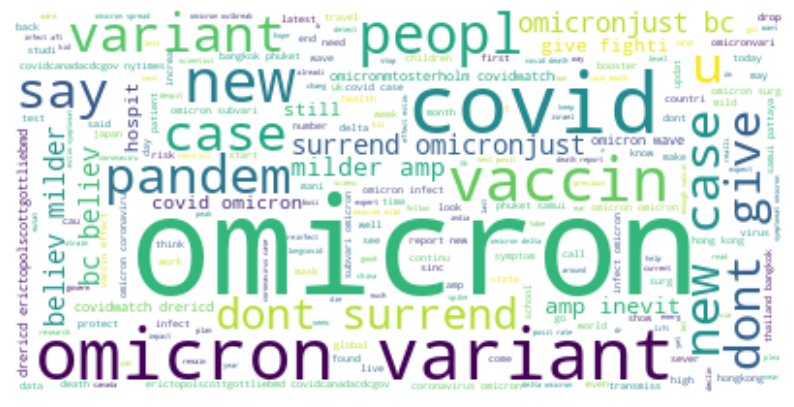

In [9]:
text = " ".join(i for i in data.text) # berfungsi untuk menggabungkan data teks yang telah di filter
stopwords = set(STOPWORDS) # berfungsi untuk mendapatkan stopwords dalam bahasa inggris
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text) # berfungsi untuk membuat wordcloud
plt.figure(figsize=(10,10)) # berfungsi untuk menentukan ukuran gambar
plt.imshow(wordcloud, interpolation='bilinear') # berfungsi untuk menampilkan gambar
plt.axis("off") # berfungsi untuk menghilangkan sumbu x dan y
plt.show()

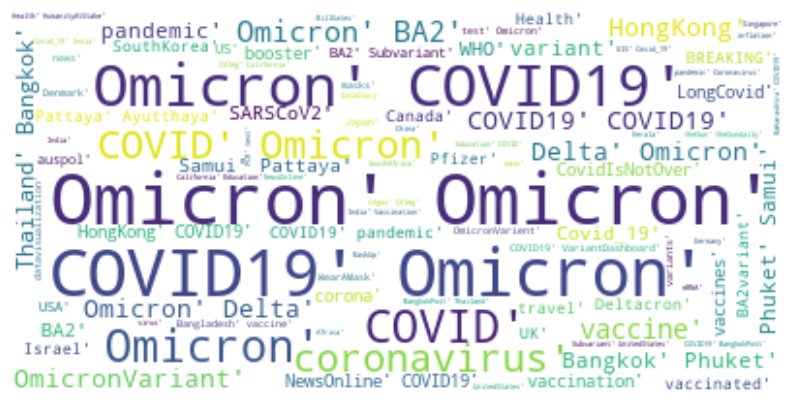

In [10]:
text = " ".join(i for i in data.hashtags) # berfungsi untuk menggabungkan data teks yang telah di filter
stopwords = set(STOPWORDS) # berfungsi untuk mendapatkan stopwords dalam bahasa inggris
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text) # berfungsi untuk membuat wordcloud
plt.figure(figsize=(10,10)) # berfungsi untuk menentukan ukuran gambar
plt.imshow(wordcloud, interpolation='bilinear') # berfungsi untuk menampilkan gambar
plt.axis("off") # berfungsi untuk menghilangkan sumbu x dan y
plt.show()

## 5. Analisis Sentimen Menggunakan Vader

Vader merupakan salah satu library yang sering dipakai untuk sentimen analisis

In [11]:
sentiments = SentimentIntensityAnalyzer() # berfungsi untuk memanggil fungsi SentimentIntensityAnalyzer
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data.text] # berfungsi untuk menentukan nilai positif pada data teks
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data.text] # berfungsi untuk menentukan nilai negatif pada data teks
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data.text] # berfungsi untuk menentukan nilai netral pada data teks
data = data[['text', 'Positive', 'Negative', 'Neutral']] # berfungsi untuk memilih kolom yang akan ditampilkan
data.head(10)

,text,Positive,Negative,Neutral
1,yaschamounk cdc say number fulli vaccin omicro...,0.126,0.0,0.874
4,winterolymp alreadi underway us olympian look...,0.000,0.0,1.000
5,doctor help discov omicron say pressur reveal ...,0.231,0.0,0.769
8,month tonga final singl doubl tappeda sickn...,0.000,0.0,1.000
11,covid pandem continu ukrain case rapid rise du...,0.000,0.0,1.000
12,covid europeanunion notif new case still high ...,0.000,0.0,1.000
17,omicron declin prompt rethink measur via wsj,0.000,0.0,1.000
19,latest custom feedback manag daili thank luci...,0.200,0.0,0.800
23,genom surveil variant predomin delta omicron …,0.000,0.0,1.000
24,peopl wprior infect vaccin tcellimmunerespon ...,0.000,0.0,1.000


In [12]:
x = sum(data["Positive"]) # berfungsi untuk menjumlahkan nilai positif pada data teks
y = sum(data["Negative"]) # berfungsi untuk menjumlahkan nilai negatif pada data teks
z = sum(data["Neutral"]) # berfungsi untuk menjumlahkan nilai netral pada data teks

def sentiment_score(a, b, c): # berfungsi untuk menentukan nilai sentimen
    if (a>b) and (a>c): # berfungsi untuk menentukan nilai sentimen positif
        print("Positive 😊 ") # berfungsi untuk menampilkan nilai sentimen positif
    elif (b>a) and (b>c): # berfungsi untuk menentukan nilai sentimen negatif
        print("Negative 😠 ") # berfungsi untuk menampilkan nilai sentimen negatif
    else: # berfungsi untuk menentukan nilai sentimen netral
        print("Neutral 🙂 ") # berfungsi untuk menampilkan nilai sentimen netral
sentiment_score(x, y, z) # berfungsi untuk memanggil fungsi sentiment_score

Neutral 🙂 


## 6. Kesimpulan

Kita bisa lihat diatas bahwa sentimen pada analisis dengan project dataset omicron ialah netral